# Marvel Entertainment in Disney+

Currently, Disney+ contains over 7000 TV shows and over 500 films that appeal to both children and adults. One of the biggest markets on the site is the entertainment that Marvel provides, focusing on movies and TV shows that are superhero based and contain plots that expand through many genres, mainly action and comedy. This notebook seeks to better illustrate to the executive team the reach that Marvel has through the site to better understand both the audience that it captures as well as areas in which it should be added or retreated. 

## Data Summary & Exploration

This dataset contains the information of all the current titles found within the Disney+ website. The dataset is constantly changing as more content is added.

### Column breakdown

 - show_id: Identifies each TV show or movie
 - type: Identifies if it is a TV show or movie
 - title, director, cast: Identifying production information
 - country: Country it was produced in
 - date_added: Date the content was added to the platform
 - release_year: Year the content was realeased
 - rating: Rating given to the content based on what audience it is directed to
 - duration: The length in time (either minutes or seasons)
 - listed_in = Genre it is listed in
 - description: Brief description of content
 - marvel: Is it content created by marvel (Y/N)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
disney = pd.read_csv('Data/disney_plus_titles.csv')

In [3]:
# Explore the data
print(disney.shape)
disney.head()

(1450, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
# Null values that each column contains
disney.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [5]:
# Add column of year added
disney['year_added'] = pd.DatetimeIndex(disney['date_added']).year

In [6]:
# Change 'listed_in' to 'genre'
disney= disney.rename(columns = {'listed_in' : 'genre'})
disney['genre'] = disney['genre'].apply(lambda x: x.split(',')[0])

## Data Cleaning

In [7]:
disney['title'] = disney['title'].str.lower()
disney['description'] = disney['description'].str.lower()

In [8]:
marvel_keywords = ['marvel', 'black widow', 'wandavision', 'deadpool', 'wolverine', 'x-men', 's.h.i.e.l.d', 
                  'daredevil', 'jessica jones', 'shang-chi', 'eternals', 'fantastic four', 'luke cage', 
                  'iron fist', 'defenders', 'loki', 'hawkeye', 'the falcon', 'moon knight', 'hulk'
                  'what if...?', 'the superhero squad', 'spider-man', 'spider-woman', 'silver surfer'
                  'groot', 'rising initiation', 'ultimate comics', 'super hero adventures', 'all hail the king'
                  'doctor strange']
content = '|'.join(marvel_keywords)

disney['marvel'] = disney['title'].str.contains(content)
disney['marvel'] = disney['marvel'].replace([True, False], ['Yes', 'No'])

## Questions Answered

### 1. Percentage of Marvel Entertainment vs Other

In [9]:
marvel_y = disney[disney['marvel']=='Yes']
marvel_n = disney[disney['marvel']=='No']

In [10]:
marvel_percentage = (disney['marvel'].value_counts()/disney['marvel'].count())*100

Text(0.5, 1.0, 'Percentage of Marvel Entertainment in Disney+')

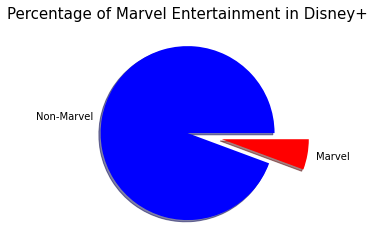

In [11]:
labels = ['Non-Marvel', 'Marvel']
colors = ('blue', 'red')

explode = (0, 0.4)
fig, ax = plt.subplots()
ax.pie(marvel_percentage, explode=explode, labels = labels, 
       colors=colors, shadow=True)
ax.set_title('Percentage of Marvel Entertainment in Disney+', fontsize = 15)


### 2. Percentage of TV Shows vs Movies in Marvel Entertainment

In [12]:
marvel_y_type = marvel_y['type'].value_counts()
marvel_n_type = marvel_n['type'].value_counts()

In [13]:
marvel_y_type_percent = (marvel_y_type/marvel_y['type'].count())*100
marvel_n_type_percent = (marvel_n_type/marvel_n['type'].count())*100

In [14]:
print(marvel_y_type_percent)

Movie      57.317073
TV Show    42.682927
Name: type, dtype: float64


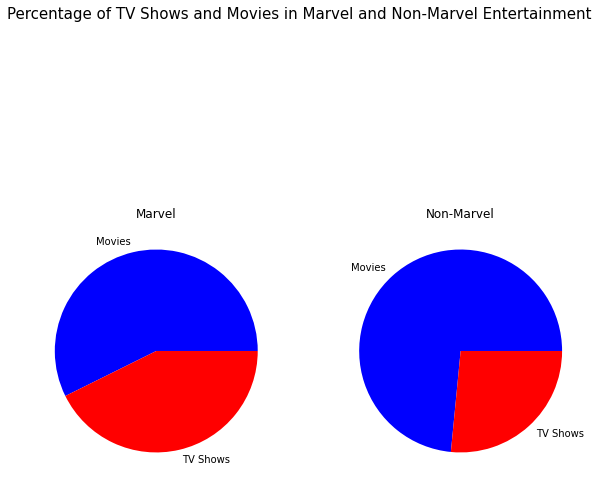

In [15]:
labels_type = ['Movies', 'TV Shows']

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,10))
fig.suptitle('Percentage of TV Shows and Movies in Marvel and Non-Marvel Entertainment', fontsize = 15)
ax1.pie(marvel_y_type_percent, labels = labels_type, colors = colors)
ax1.set_title('Marvel')
ax2.pie(marvel_n_type_percent, labels = labels_type, colors = colors)
ax2.set_title('Non-Marvel')

plt.show()

### 3. Statistics of Entertainment added through the years

In [16]:
marvel_year_added = marvel_y.groupby('year_added').agg('count').reset_index()
non_marvel_year_added = marvel_n.groupby('year_added').agg('count').reset_index()
year_added = disney['year_added']

In [17]:
marvel_year_added

,year_added,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,marvel
0,2019.0,44,44,44,19,36,37,44,44,44,44,44,44,44
1,2020.0,16,16,16,10,13,14,16,16,16,16,16,16,16
2,2021.0,22,22,22,11,18,15,22,22,21,22,22,22,22


AttributeError: 'Rectangle' object has no property 'colors'

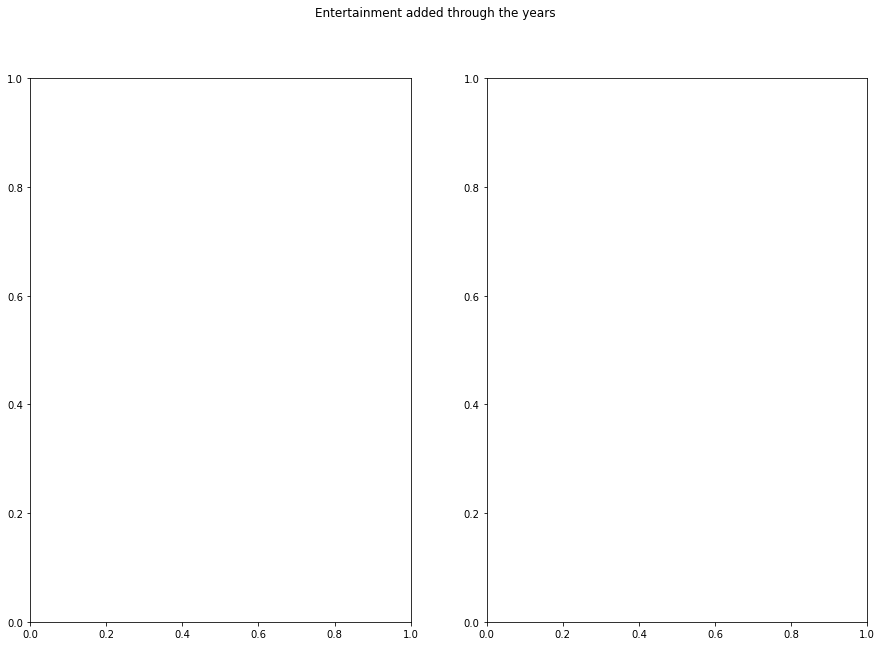

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,10))
fig.suptitle('Entertainment added through the years')
marvel_year_added.plot(kind='bar', x='year_added', y='show_id', ax = ax1, legend= None, colors = 'blue')
ax1.tick_params(axis='x', rotation = 0)
ax1.set_title('Marvel')
ax1.set_ylabel('Amount Added')
ax1.set_xlabel('Year')
non_marvel_year_added.plot(kind='bar', x='year_added', y='show_id', ax = ax2, legend= None, colors = 'blue')
ax2.tick_params(axis='x', rotation = 0)
ax2.set_ylabel('Amount Added')
ax2.set_xlabel('Year')
ax2.set_title('Non-Marvel')

plt.show()

### 4. Genre breakdown of Marvel and Non-Marvel Entertainment

In [ ]:
marvel_genre = marvel_y.groupby('genre').agg('count').reset_index()
non_marvel_genre = marvel_n.groupby('genre').agg('count').reset_index()

In [ ]:
marvel_genre

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,15))
fig.suptitle('Genre Breakdown', fontsize = 15)
fig.tight_layout(pad = 15)
marvel_genre.plot(kind='barh', x='genre', y='show_id', ax = ax1, legend= None, colors = 'blue')
ax1.tick_params(axis='x', rotation = 0)
ax1.set_title('Marvel')
non_marvel_genre.plot(kind='barh', x='genre', y='show_id', ax = ax2, legend= None, colors = 'blue')
ax2.tick_params(axis='x', rotation = 0)
ax2.set_title('Non-Marvel')


plt.show()

### 5. Rating Breakdown

In [ ]:
marvel_rating = marvel_y.groupby('rating').agg('count').reset_index()
non_marvel_rating = marvel_n.groupby('rating').agg('count').reset_index()

In [ ]:
marvel_rating

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,15))
fig.suptitle('Rating Breakdown', fontsize = 15)
fig.tight_layout(pad = 15)
marvel_rating.plot(kind='barh', x='rating', y='show_id', ax = ax1, legend= None, colors = 'blue')
ax1.tick_params(axis='x', rotation = 0)
ax1.set_title('Marvel')
non_marvel_rating.plot(kind='barh', x='rating', y='show_id', ax = ax2, legend= None, colors = 'blue')
ax2.tick_params(axis='x', rotation = 0)
ax2.set_title('Non-Marvel')


plt.show()

## Conclusion 

This notebook aims to demonstrate various statistics regarding the content that is provided by Marvel in the Disney+ streaming service and provides information to the executive board regarding the type of content that dominates the platform. These statistics show that although Marvel is a big powerhouse when it comes to the overall entertainment provided, it stills has areas that it can expand to, especially in the genre and rating departments. Overall, these plots give an insight into the platform and it could be further expanded to other studios such as Pixar. 